#### Project Overview

We have been tasked with creating a predictive model of a buildings heating and cooling loads (Energy Efficiency). Our client, ABC Commercial Real Estate holdings has asked us to provide them with this predictive model so they can get and idea of the heating and cooling load of their entire portfolio without actually having to rate each building. There is huge $ saving potential if we can provide them with an accurate way of predciting these metrics based of of the existing building characteristics they already have.

We have been provide with the building characteristics and the Heating and Cooling loads of 768 buildings in their portfolio which have been rated. We will use this data to come out with our predictive model to help ABC Commercial Real Estate out so they can estimate their remaining 1,500 buildings in their portfolio.

#### Executive Summary

From our exploration of the data we concluded that many of the variables do correlate well to the heating and cooling loads of the buildings we have data for and thus would be suitable to build a linear regression model. 

From the analysis, our model will be able to provide a fairly accurate view of their buildings heating and cooling loads. Our models for heating and cooling loads had a Root Mean Squared Error or difference between predicted and actual values of ~13%. While this isn't as accurate as we would have liked it will still provide the company with an accurate estimation of the energy efficency of their buildings if they are looking at an aggregated view of their entire portfolio. Because of the inidividual differences in actual vs predicted this model should to not be used to accurately assess the heating and colling loads of individual buildings.

#### Load, Inspect and Clean Data

In [25]:
#Load Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv('energy_efficiency_data.csv')

In [26]:
#Inspect Data
print(df.describe())
#Check for null values
null_rows  = df[df.isnull().any(axis=1)]
#No null values
#From describe the data looks clean so we will proceed to EDA

       Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

#### Exploratory Data Analysis

1.From EDA we can see the cooling and heating distributions are bimodal. What is interesting is that heating a colling loads are not distributed in the same way. When we plot on a scatter plot they are strongly correlated but the isn't a perfectly correlated relationship between heating a cooling load which I think is interesting.

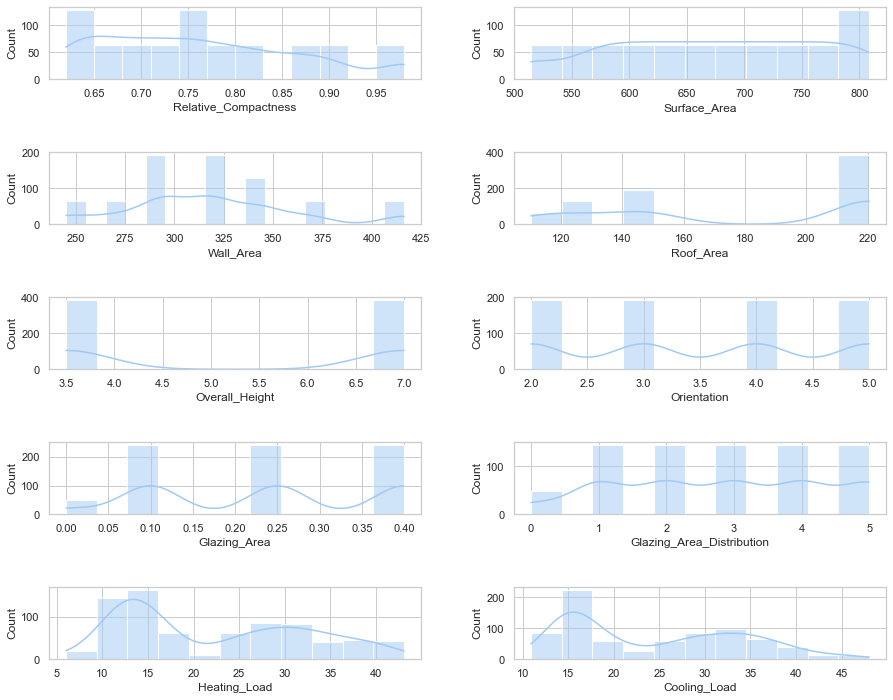

<Figure size 432x288 with 0 Axes>

In [27]:
#Explore data istributions of columns
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=1, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

sns.histplot(data=df, x="Relative_Compactness", kde=True, ax=axes[0,0])
sns.histplot(data=df, x="Surface_Area", kde=True, ax=axes[0,1])
sns.histplot(data=df, x="Wall_Area", kde=True, ax=axes[1,0])
sns.histplot(data=df, x="Roof_Area", kde=True, ax=axes[1,1])
sns.histplot(data=df, x="Overall_Height", kde=True, ax=axes[2,0])
sns.histplot(data=df, x="Orientation", kde=True, ax=axes[2,1])
sns.histplot(data=df, x="Glazing_Area", kde=True, ax=axes[3,0])
sns.histplot(data=df, x="Glazing_Area_Distribution", kde=True, ax=axes[3,1])
sns.histplot(data=df, x="Heating_Load", kde=True, ax=axes[4,0])
sns.histplot(data=df, x="Cooling_Load", kde=True, ax=axes[4,1])

plt.show()
plt.clf()

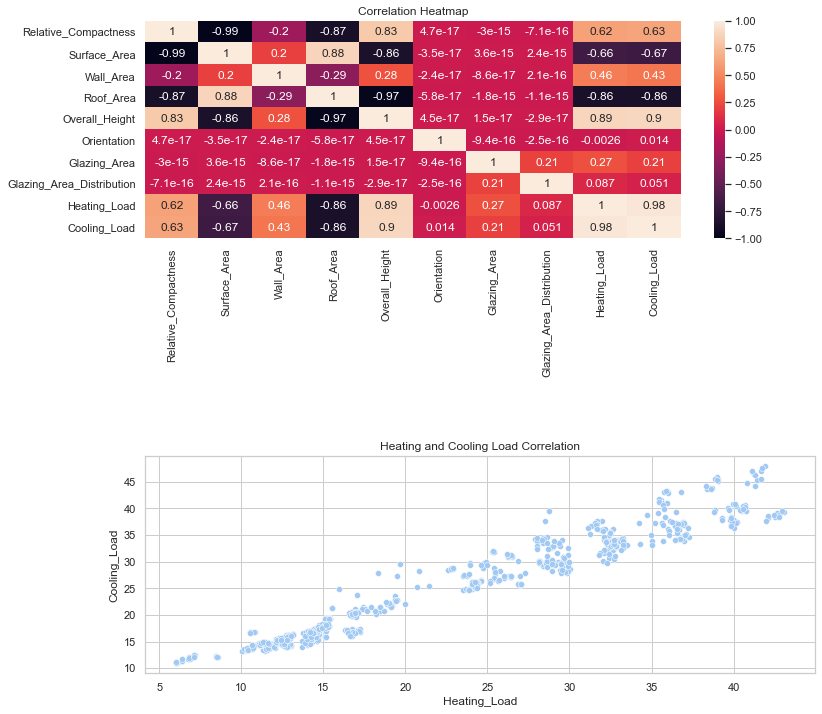

<Figure size 432x288 with 0 Axes>

In [28]:
#Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
fig.subplots_adjust(hspace=1, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

#plot heat map to determine correlation amongst values
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, annot=True, ax=axes[0]).set_title("Correlation Heatmap")


#plot heating and cooling load to compare relationship
sns.scatterplot(data=df, x='Heating_Load', y='Cooling_Load', ax=axes[1]).set_title("Heating and Cooling Load Correlation")
plt.show()
plt.clf()

#### Regression Analysis Model

1.Our root mean squared error for both Heating and Cooloing loads is ~ 13% which is greater then 10% of the median loads in the actual data set. This means our model will not be as accurate as it could be but will still provide good prediction capability for the City of Toronto to add Heating and Cooling loads to its building database.

In [29]:
#Heating Regression Model
#Prepare Data
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
y = df['Heating_Load']

#Divide into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

#Training the Algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Correlation'])
print(coeff_df)

#Make Predictions
y_pred = regressor.predict(X_test)
df_xtest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_xtest)

#Evaluate Model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error % of Actual Mean:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / df.Heating_Load.mean())

                            Correlation
Relative_Compactness      -6.200730e+01
Surface_Area              -1.044742e+12
Wall_Area                  1.044742e+12
Roof_Area                  2.089483e+12
Overall_Height             3.968737e+00
Orientation               -1.089224e-01
Glazing_Area               1.817308e+01
Glazing_Area_Distribution  1.332835e-01
     Actual  Predicted
661   15.18  17.213297
122   10.32   8.269168
113   37.26  29.804559
14    16.95  26.299262
529   32.26  30.984893
..      ...        ...
378   17.02  14.932630
685   28.05  34.210549
22    24.77  32.061225
692   40.68  40.081434
276   11.38  12.136864

[461 rows x 2 columns]
Mean Absolute Error: 2.1591083937660835
Mean Squared Error: 9.493343743482082
Root Mean Squared Error: 3.0811270248858746
Root Mean Squared Error % of Actual Mean: 0.1381225323190297


In [31]:
#Cooling Regression Model
#Prepare Data
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
y = df['Cooling_Load']

#Divide into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

#Training the Algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Correlation'])
print(coeff_df)

#Make Predictions
y_pred = regressor.predict(X_test)
df_xtest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_xtest.Predicted.mean())

#Evaluate Model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error % of Actual Mean:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / df.Cooling_Load.mean())

                            Correlation
Relative_Compactness      -7.786828e+01
Surface_Area              -1.479825e+12
Wall_Area                  1.479825e+12
Roof_Area                  2.959650e+12
Overall_Height             4.118438e+00
Orientation                1.607884e-01
Glazing_Area               1.299754e+01
Glazing_Area_Distribution  2.151834e-03
24.959703833369893
Mean Absolute Error: 2.2179471429914197
Mean Squared Error: 9.90499554920503
Root Mean Squared Error: 3.147220289271952
Root Mean Squared Error % of Actual Mean: 0.12799946948964988
